- **Purpose:** Perform QC on Slide-SeqV2 mouse HPC dataset using SpotSweeper bioconductor pacakge
- **Author:** Tamim Ahsan
- **Date:** January 3, 2026

# 1. Load packages and data

In [1]:
# Packages
library(SpotSweeper)
library(scuttle)

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    

In [2]:
# Data 
spe <- STexampleData::SlideSeqV2_mouseHPC() # a single sample SLide-Seq V2 data 
spe

see ?STexampleData and browseVignettes('STexampleData') for documentation

downloading 1 resources

retrieving 1 resource



loading from cache



class: SpatialExperiment 
dim: 23264 53208 
metadata(0):
assays(1): counts
rownames(23264): 0610005C13Rik 0610007P14Rik ... n-R5s40 n-R5s95
rowData names(1): gene_name
colnames(53208): AACGTCATAATCGT TACTTTAGCGCAGT ... GACTTTTCTTAAAG
  GTCAATAAAGGGCG
colData names(3): barcode_id sample_id celltype
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):
spatialCoords names(2) : xcoord ycoord
imgData names(0):

# 2. Explore the dataset

In [4]:
# Look at the gene-related metadata 
rowData(spe)

DataFrame with 23264 rows and 1 column
                  gene_name
                <character>
0610005C13Rik 0610005C13Rik
0610007P14Rik 0610007P14Rik
0610009B22Rik 0610009B22Rik
0610009E02Rik 0610009E02Rik
0610009L18Rik 0610009L18Rik
...                     ...
n-R5-8s1           n-R5-8s1
n-R5s173           n-R5s173
n-R5s33             n-R5s33
n-R5s40             n-R5s40
n-R5s95             n-R5s95

In [5]:
# Look at the sample-related metadata
colData(spe)

DataFrame with 53208 rows and 3 columns
                   barcode_id   sample_id    celltype
                  <character> <character> <character>
AACGTCATAATCGT AACGTCATAATCGT    sample01          NA
TACTTTAGCGCAGT TACTTTAGCGCAGT    sample01          NA
CATGCCTGGGTTCG CATGCCTGGGTTCG    sample01          NA
TCGATATGGCACAA TCGATATGGCACAA    sample01          NA
TTATCTGACGAAGC TTATCTGACGAAGC    sample01          NA
...                       ...         ...         ...
ACAATACAGATACT ACAATACAGATACT    sample01          NA
GGTCAGGTTAACGT GGTCAGGTTAACGT    sample01          NA
CATTATGGAATTCT CATTATGGAATTCT    sample01          NA
GACTTTTCTTAAAG GACTTTTCTTAAAG    sample01          NA
GTCAATAAAGGGCG GTCAATAAAGGGCG    sample01          NA

In [7]:
# Spatial coordinates
spatialCoords(spe)

,xcoord,ycoord
AACGTCATAATCGT,888.95,3219.5
TACTTTAGCGCAGT,4762.20,5020.4
CATGCCTGGGTTCG,886.50,3199.6
TCGATATGGCACAA,2237.10,5144.6
TTATCTGACGAAGC,1031.80,2425.2
GATGCGACTCCTCG,5387.00,2291.6
ACGGATGTTCCGAT,3760.30,4171.7
TCTCATGGGTGGGA,1007.90,3523.8
ACCGGAACTTCTTC,3259.40,1233.7
ACAGGGTTTATCGA,5408.20,2921.7


In [8]:
# Names of the assays
assayNames(spe)

[1] "counts"

# 3. Calculate QC metrics with scuttle

In [12]:
# Look at the column names of gene-related metadata
colnames(rowData(spe)) # to check if gene names are the rownames of this dataframe

[1] "gene_name"

In [13]:
# Look at the column names of sample-related metadata
colnames(colData(spe))

[1] "barcode_id" "sample_id"  "celltype"

In [11]:
# Mitochondrial genes
is.mito <- rownames(spe)[grepl("^mt-", rownames(spe))]
is.mito

[1] "mt-Co1"  "mt-Co2"  "mt-Co3"  "mt-Cytb" "mt-Nd1"  "mt-Nd2"  "mt-Nd3" 
 [8] "mt-Nd4"  "mt-Nd5"  "mt-Nd6"  "mt-Rnr1" "mt-Rnr2" "mt-Ta"   "mt-Tc"  
[15] "mt-Tf"   "mt-Ti"   "mt-Tl1"  "mt-Tl2"  "mt-Tm"   "mt-Tp"   "mt-Tq"  
[22] "mt-Tr"   "mt-Ts2"  "mt-Tt"   "mt-Tv"

In [14]:
# Add per-cell (per-spot, in this case) QC metrics values to the spe object
spe <- addPerCellQC(spe,
                    subsets = list(Mito = is.mito))
colnames(colData(spe)) # check the names of the newly added columns

[1] "barcode_id"            "sample_id"             "celltype"             
[4] "sum"                   "detected"              "subsets_Mito_sum"     
[7] "subsets_Mito_detected" "subsets_Mito_percent"  "total"

# 4. Identify local outliers

In [15]:
# Local outlier detection -
# based on library size
spe <- localOutliers(
  spe,
  metric = "sum", # library size
  direction = "lower", # lower than a certain value (value of the metic - 3*z_score)
  log = TRUE, # log1p transformation is done
  n_neighbors = 50 # based on the value found in the SpotSweeper's github repo
)

# based on the number of detected genes
spe <- localOutliers(
  spe,
  metric = "detected",
  direction = "lower",
  log = TRUE,
  n_neighbors = 50
)

# based on the percentage of reads mapped to mitochondrial genes
spe <- localOutliers(
  spe,
  metric = "subsets_Mito_percent",
  direction = "higher",
  log = FALSE,
  n_neighbors = 50
)

In [16]:
# New columns x_outliers have been added the to the colData
colnames(colData(spe))

[1] "barcode_id"                    "sample_id"                    
 [3] "celltype"                      "sum"                          
 [5] "detected"                      "subsets_Mito_sum"             
 [7] "subsets_Mito_detected"         "subsets_Mito_percent"         
 [9] "total"                         "sum_log"                      
[11] "sum_outliers"                  "sum_z"                        
[13] "detected_log"                  "detected_outliers"            
[15] "detected_z"                    "subsets_Mito_percent_outliers"
[17] "subsets_Mito_percent_z"

In [17]:
# Combine all the outliers into a single column
spe$local_outliers <- as.logical(spe$sum_outliers) |
  as.logical(spe$detected_outliers) |
  as.logical(spe$subsets_Mito_percent_outliers)
table(spe$local_outliers)


FALSE  TRUE 
52812   396 

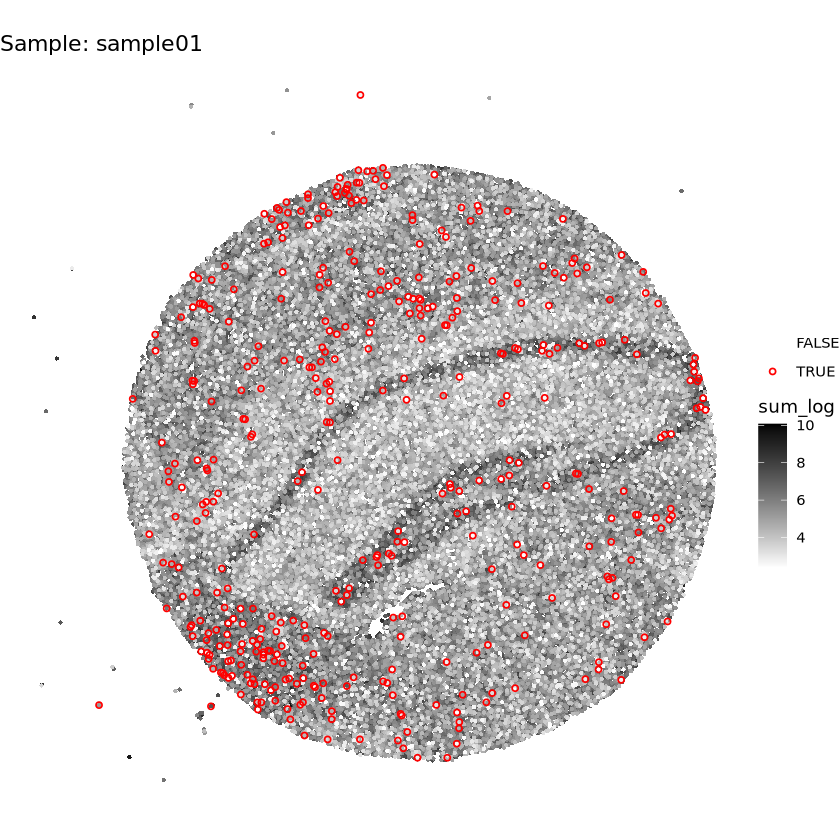

In [18]:
# Plot the outliers
plotQCmetrics(spe,
              metric = "sum_log",
              outliers = "local_outliers",
              point_size = 1.2,
              stroke = 0.75)

In [19]:
sessionInfo()

R version 4.5.2 (2025-10-31)
Platform: x86_64-conda-linux-gnu
Running under: SUSE Linux Enterprise Server 15 SP6

Matrix products: default
BLAS/LAPACK: /nexus/posix0/MPI-psych/g/dept-binder/mpsmgp/ahsant/software/miniforge3/envs/tutor/lib/libopenblasp-r0.3.30.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] STexampleData_1.18.0        SpatialExperiment_1.20.0   
 [3] ExperimentHub_3.0.0         AnnotationHub_4.0.0        
 [5] BiocFileCache_3.0.0         